<h1>Binary Classification using a Shallow Neural Network</h1>
<p>In this Python Notebook, I will be making a 2-layer neural network that will classify an Iris-flower into <i>Iris-virginica</i> and <i>Iris-versicolor</i></p>

<h2>Theory</h2>
<img src="https://cdn-images-1.medium.com/max/1600/1*QVIyc5HnGDWTNX3m-nIm9w.png" />
<p>Above is an architecutre of a 2-layer neural network (also known as Shallow Neural Network). Earlier we had used a Perceptron model to linearly classify an Iris-flower. Now we will be making a neural network to classify an Iris-flower irrespective of being separated linearly or non-linearly. The only difference between this and Perceptron is the addition of a hidden layer (marked in blue color).</p>
<p>A hidden layer helps for the feature extraction process. This layer helps to find out which input values are linear and non-linearly related to each other and help improve the model.</p>

<h2>Importing packages</h2>
<p>The three packages that have rocked the data science world are :-</p>
<ol>
    <li>NumPy, for vectorized calculations</li>
    <li>Matplotlib, for data visualization</li>
    <li>Pandas, for reading and manipulating with dataset</li>
</ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

<h2>Fetching the dataset</h2>
<p>Using pandas' read_csv( ) function, we read the iris.csv file from the current directory. As the flower ID (column = 'Id') is not useful for us in any way, we can simply drop it. Just for our sanity check, we print the first 5 rows of the dataset.</p>

In [2]:
dataset = pd.read_csv('iris.csv').drop(['Id'], axis=1)
print(dataset.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


<h2>Separating the dataset</h2>
<p>After fetching the dataset, we see that there are following features :-</p>
<ol>
    <li>SepalLengthCm : The length of the sepal in centimeters</li>
    <li>SepalWidthCm : The width of the sepal in centimeters</li>
    <li>PetalLengthCm : The length of the petal in centimeters</li>
    <li>PetalWidthCm : The widht of the petal in centimeters</li>
</ol>
<p>We also see the 'Species' column which has the following values :-</p>
<ol>
    <li><i>Iris-setosa</i></li>
    <li><i>Iris-virginica</i></li>
    <li><i>Iris-versicolor</i></li>
</ol>
<p>Based on above different values, we segragate the data based on the sepal and petal measurements for each flower species</p>

In [3]:
iris_setosa = dataset[dataset['Species'] == 'Iris-setosa']
sepal_iris_setosa = iris_setosa.loc[:, ['SepalLengthCm', 'SepalWidthCm']]
petal_iris_setosa = iris_setosa.loc[:, ['PetalLengthCm', 'PetalWidthCm']]

iris_virginica = dataset[dataset['Species'] == 'Iris-virginica']
sepal_iris_virginica = iris_virginica.loc[:, ['SepalLengthCm', 'SepalWidthCm']]
petal_iris_virginica = iris_virginica.loc[:, ['PetalLengthCm', 'PetalWidthCm']]

iris_versicolor = dataset[dataset['Species'] == 'Iris-versicolor']
sepal_iris_versicolor = iris_versicolor.loc[:, ['SepalLengthCm', 'SepalWidthCm']]
petal_iris_versicolor = iris_versicolor.loc[:, ['PetalLengthCm', 'PetalWidthCm']]

<h2>Visualizing the data</h2>
<p>For our case, we will classify the Iris flower based on the sepal and petal measurements for the two classes - <i>Iris-virginica</i> and <i>Iris-versicolor</i></p>
<p>To check whether there exists any relationship between these types of flowers, we draw a scatter plot using Matplotlib library's scatter( ) function. This function takes in following arguments :-</p>
<ol>
    <li>Values on the X-axis</li>
    <li>Values on the Y-axis</li>
    <li>Color of the data point (OPTIONAL)</li>
</ol>
<p>Then just to make our graph more easier to read, we add title and labels for the respective axes.</p>

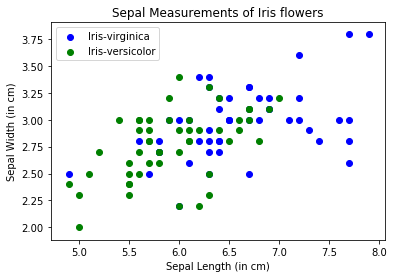

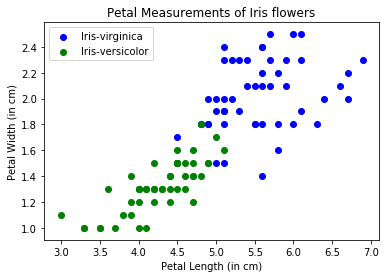

In [4]:
plt.scatter(sepal_iris_virginica['SepalLengthCm'], sepal_iris_virginica['SepalWidthCm'], color="blue", label="Iris-virginica")
plt.scatter(sepal_iris_versicolor['SepalLengthCm'], sepal_iris_versicolor['SepalWidthCm'], color="green", label="Iris-versicolor")
plt.title('Sepal Measurements of Iris flowers')
plt.xlabel('Sepal Length (in cm)')
plt.ylabel('Sepal Width (in cm)')
plt.legend()
plt.show()

plt.scatter(petal_iris_virginica['PetalLengthCm'], petal_iris_virginica['PetalWidthCm'], color="blue", label="Iris-virginica")
plt.scatter(petal_iris_versicolor['PetalLengthCm'], petal_iris_versicolor['PetalWidthCm'], color="green", label="Iris-versicolor")
plt.title('Petal Measurements of Iris flowers')
plt.xlabel('Petal Length (in cm)')
plt.ylabel('Petal Width (in cm)')
plt.legend()
plt.show()

<h2>Feature Selection and Encoding</h2>
<p>We now select the features we are going to use (sepal and petal measurements i.e SepalLengthCm, SepalWidthCm, PetalLengthCm and PetalWidthCm). After selecting the features, we also require to encode the class labels, that is, 1 for positive class and 0 for negative class.</p>
<p>We do the above steps using suitable NumPy and Pandas functions. After completion, we then perform the train-test split on our dataset. The train set will be used for training our neural network and the test set will be used for predicting unseen flowers.</p>

In [5]:
data = dataset[dataset['Species'] != 'Iris-setosa']
labels = data['Species']
features = data.drop(['Species'], axis=1).values

labels = np.where(labels == 'Iris-virginica', 1, 0)
labels = labels.reshape(labels.shape[0], 1)

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=0)
features_train = features_train.T
features_test = features_test.T

<h2>Activation Functions</h2>
<p>Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable.They introduce non-linear properties to our Network.Their main purpose is to convert a input signal of a node in a A-NN to an output signal. That output signal now is used as a input in the next layer in the stack.</p>
<p>We have used the following activation functions :-</p>
<ul>
    <li>tanh (Hyperbolic tangent function) -<br>This activation function is used in the hidden layer</li>
    <li>Sigmoid or Logistic function -<br>This activation function is used in the output layer</li>
</ul>
<p>Moreover, we have also created the helper functions which calculate the derivatives of the activation functions. These helper functions are utilized in computations required in the backpropogation algorithm</p>

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    z = sigmoid(z)
    return z * (1 - z)

def tanh(z):
    t1 = np.exp(z)
    t2 = np.exp(-z)
    return (t1 - t2) / (t1 + t2)

def tanh_derivative(z):
    t = tanh(z)
    return 1 - np.power(t, 2)

<h2>Network Architecture and Parameter Initialization</h2>
<p>We require the 'W' and 'b' parameters so as to build our neural network model. But we need to setup our neural network architecture i.e no. of input units, no. of hidden units, and the number of output units. Using a helper function, we return the mentioned units.</p>
<p>For training the learning algorthm, we require some initial values from which the process will start. Therefore, we initialize the weights to random values and biases to zeros. To do this, we build a helper function which takes in the number of units in each layer and returns the weights and biases as a dictionary, having the appropritate dimensions</p>

In [7]:
def get_network_arch_units(x):
    return [x.shape[0], x.shape[0] + 1, 1]

def initialize_weights(input_units, hidden_units, output_units):
    W1 = np.random.randn(hidden_units, input_units) * 0.01
    b1 = np.zeros((hidden_units, 1))
    W2 = np.random.randn(output_units, hidden_units) * 0.01
    b2 = np.zeros((output_units, 1))
    params = {'W1' : W1, 'W2' : W2, 'b1': b1, 'b2' : b2}
    
    return params

units = get_network_arch_units(features_train)
input_unit, hidden_unit = units[0], units[1]
output_unit = units[2]
parameters = initialize_weights(input_unit, hidden_unit, output_unit)
W1, W2, b1, b2 = parameters['W1'],parameters['W2'],parameters['b1'],parameters['b2']

<h2>Forward propogation and Derivatives</h2>
<p>This function contains code that computes the probability that Y = 1; given X - as well as computes the gradients i.e small changes in weights required to be updated (for backpropogation).</p>
<p>The intuition of using the logistic function is that it will give us the probability that our output is 1. E.g : h(x) = 0.7 implies that there is 70% chance that our output is 1.</p>
<p>Below are some notations used :-</p>
<ol>
    <li>m - Number of training examples</li>
    <li>A0 - Input layer activations</li>
    <li>Z1 - Net input i.e W1<sup>T</sup>.A0 + b1</li>
    <li>A1 - tanh of the net input Z1</li>
    <li>Z2 - Net input i.e W2<sup>T</sup>.A1 + b2</li>
    <li>A2 - tanh of the net input Z2</li>
    <li>J - Cost function</li>
    <li>dW2 - Derivatives for weights W2 (Small changes required in weights)</li>
    <li>db2 - Derivative for biases b2 (Small change required in biases)</li>
    <li>dW1 - Derivatives for weights W1 (Small changes required in weights)</li>
    <li>db1 - Derivative for biasES B1 (Small change required in biases)</li>
</ol>
<p>After computing the respective values, we return the gradients and value of cost function so that the learning algorithm can utilize these in order to make the model a good flower classifier.</p>

In [8]:
def forward_propogation(X, y, W1, W2, b1, b2):
    m = X.shape[1]
    A0 = np.copy(X)
    Z1 = np.dot(W1, A0) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    J = np.sum(y * np.log(A2) + (1 - y) * np.log(1 - A2)) / -m
    
    dZ2 = A2 - y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    db2 = db2.reshape(1,1)
    
    dZ1 = np.dot(W2.T, dZ2) * tanh_derivative(Z1)
    dW1 = np.dot(dZ1, A0.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    gradients = {'dW1' : dW1, 'db1' : db1, 'dW2' : dW2, 'db2': db2}
    
    return gradients, J
    
gradients, cost = forward_propogation(features_train, labels_train.T, W1, W2, b1, b2)

<h2>Training the neural network using Backpropogation</h2>
<p>This function uses gradient descent optimization technique, which is used so as to choose the suitable values of our parameters in order to minimize the cost function. Our function uses two new arguments as follows :-</p>
<ul>
    <li>alpha - Learning rate or step size for the gradient descent</li>
    <li>epochs - Number of iterations we wish to train our algorithm</li>
</ul>
<p>Now, for particular epoch / iteration, following steps are covered :-</p>
<ol>
    <li>Compute the gradients and cost using forward propogation</li>
    <li>Append the cost value to a list for further analysis of our learning algorithm (OPTIONAL)</li>
    <li>Print the cost value after every set of iteration (OPTIONAL)</li>
    <li>Use the formula to update the weights and bias (MUST)</li>
</ol>
<p>After training, we return the optimal values of the weights as well as return the costs computed over the period of training the algorithm</p>

In [9]:
def fit(X, y, W1, W2, b1, b2, epochs=100000, alpha=0.009):
    costs = []
    m = X.shape[1]
    for i in range(epochs):
        grads, cost = forward_propogation(X, y, W1, W2, b1, b2)
        costs.append(cost)
        if i % (epochs // 10) == 0:
            print("Cost after epoch " + str(i) + " : ", cost)
        dW1, db1, dW2, db2 = grads['dW1'], grads['db1'], grads['dW2'], grads['db2']
        
        W1 -= alpha * dW1
        W2 -= alpha * dW2
        b1 -= alpha * db1
        b2 -= alpha * db2
    
    params = {'W1' : W1, 'b1' : b1, 'W2' : W2, 'b2': b2}
    print("Training complete")
    return params, costs

params, costs = fit(features_train, labels_train.T, W1, W2, b1, b2)

Cost after epoch 0 :  0.6931513282379376
Cost after epoch 10000 :  0.053440912503251135
Cost after epoch 20000 :  0.03471071689627943
Cost after epoch 30000 :  0.02714190848699192
Cost after epoch 40000 :  0.0225597159187615
Cost after epoch 50000 :  0.01933567622286644
Cost after epoch 60000 :  0.016885531505855388
Cost after epoch 70000 :  0.014937582560536487
Cost after epoch 80000 :  0.013343524423527075
Cost after epoch 90000 :  0.012012899047607686
Training complete


<h2>Predictions over new data</h2>
<p>This function uses the optimal parameter values and computes the probability via forward pass and compares the results to the labels, so as to compute the accuracy of our model.</p>

In [10]:
def predict(params, X_test, Y_test):
    W1, b1, W2, b2 = params['W1'], params['b1'], params['W2'], params['b2']
    A0 = np.copy(X_test)
    Z1 = np.dot(W1, A0) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    pred = sigmoid(Z2)
    
    pred_labels = np.where(pred > 0.5, 1, 0)
    accuracy = 100 * np.mean(pred_labels == Y_test)
    print("Accuracy : " + str(accuracy) + " %")
    
predict(params, features_test, labels_test.T)

Accuracy : 90.0 %


<h2>Learning Curve</h2>
<p>Now using Matplotlib, we plot the cost values of our algorithm over the number of iterations (epochs). This curve gives us an insight that our learning algorithm is doing pretty well.</p>

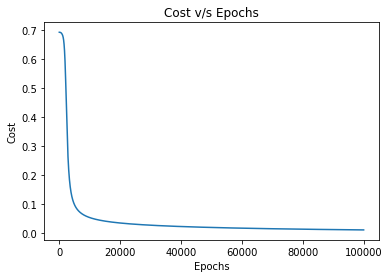

In [11]:
plt.plot(range(100000), costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost v/s Epochs')
plt.show()